<a id='top'></a>
# Asymptotics of Quark Helicity at small-x: The Bayesian Approach

This project is created by Josh Tawabutr as part of Physics 8820: <i>Learning from data: Bayesian methods and (some) machine learning</i> at the Ohio State University in autumn semester 2021.


## Table of Contents

[Introduction](#intro)

[Setup and Procedure](#setup)

[Numerical Integration](#int)

[Bayesian Parameter Estimation I](#est1)

[Bayesian Parameter Estimation II](#section_id)

[Conclusion](#conc)




<a id='intro'></a>
## Introduction

The proton spin puzzle has been a long-standing problem in high-energy nuclear physics. Although we know that the proton is a spin-$\frac{1}{2}$ particle and that it is made of quarks and, at high energy, gluons, it is not as clear how much of the total proton spin comes from the spin of the quarks inside. The total quark spin can be written as
$$S_q = \frac{1}{2}\int_0^1dx\;\Delta\Sigma(x),$$
where $\Delta\Sigma(x)$ is the quark helicity distribution, summed over the quark flavors. The quantity, $\Delta\Sigma(x)$, can be deduced from experimental results at each value $x$. Here, $x$ is the parameter called "Bjorken-$x$", which can be generally thought of as the inverse of the energy. Hence, a very high-energy scattering experiment would be required to obtain the value of $\Delta\Sigma(x)$ in the limit where $x\to 0$, that is, one can realistically determine $\Delta\Sigma(x)$ from the experiment down to some finite minimum $x_{\min}$ only. 

This is where this project comes in. The main goal of the project is to determine the asymptotic form of $\Delta\Sigma(x)$ as $x\to 0$. In [arXiv:1511.06737](https://arxiv.org/abs/1511.06737), [arXiv:1808.09010](https://arxiv.org/abs/1808.09010) and [arXiv:2005.07285](https://arxiv.org/abs/2005.07285), a system of integral equations have been derived for the function $Q(s_{10},\eta)$ in the limit of large numbers of quark colors, $N_c$, and flavors, $N_f$. The function represents the helicity-dependent quark dipole at small-$x$, and it relates to $\Delta\Sigma(x)$ through the relation
$$\Delta\Sigma(x) = \frac{N_f}{\alpha_s\pi^2}\int_0^{\sqrt{\frac{\alpha_sN_c}{2\pi}}\ln\frac{1}{x}}d\eta\int_{\eta-\sqrt{\frac{\alpha_sN_c}{2\pi}}\ln\frac{1}{x}}^{\eta}ds_{10}\;Q(s_{10},\eta),$$
where $\alpha_s$ is the strong coupling constant. 

This relation allows us to determine the small-$x$ asymptotic of $\Delta\Sigma(x)$ by solving the system of equations given in the references for $Q(s_{10},\eta)$. In [arXiv:2005.07285](https://arxiv.org/abs/2005.07285), the system is solved numerically, yielding the values of $Q(s_{10},\eta)$ at various $s_{10}$ and $\eta$. The functional form is fitted to the numerical results using a frequentist approach to draw conclusions about the small-$x$ asymptotic forms of $\Delta\Sigma(x)$. In this project, we employ Bayesian methods to redo the fitting steps from the numerical values of $Q(s_{10},\eta)$ computed in the reference.




<a id='setup'></a>
## Setup and Procedure

The numerical value of $Q(s_{10},\eta)$ was computed in [arXiv:2005.07285](https://arxiv.org/abs/2005.07285) by discrezing its system of integral equations. For each discretization step size, $\Delta\eta$, the computation resulted in $Q_{ij} = Q(s_{10} = i\Delta\eta, \eta = j\Delta\eta)$ for $i\in\{0, \pm 1, \pm 2,\ldots, \pm K_{\Delta\eta}\}$ and $j\in\{0, 1,2,\ldots,K_{\Delta\eta}\}$, where $K_{\Delta\eta}$ is the maximum number of steps for which the computation was performed for step size $\Delta\eta$. In the reference, the available data correspond to

| Step size ($\Delta\eta$) | Number of steps ($K_{\Delta\eta}$) |
| :-: | :-: |
| $0.1000$ | $500$ |
| $0.0750$ | $400$ |
| $0.0625$ | $480$ |
| $0.0500$ | $400$ |
| $0.0375$ | $560$ |
| $0.0250$ | $800$ |

In principle, these results become exact in the continuum limit, $\Delta\eta\to 0$.

To determine the continuum-limit asymptotic form of $\Delta\Sigma(x)$ as $x\to 0$, we perform the following steps.

<b>1. Numerical integration:</b> For each step size $\Delta\eta$, we compute the discretized version of $\Delta\Sigma(x)$, which from its integral relation is given by

$$\Delta\Sigma_k = \Delta\Sigma\left(x = e^{-k\Delta\eta\sqrt{\frac{2\pi}{\alpha_sN_c}}}\right) = \frac{N_f}{\alpha_s\pi^2}(\Delta\eta)^2\sum_{j=0}^{k-1}\sum_{i=j-k+1}^{j}Q_{ij}$$

From the equation, larger $k$ corresponds to smaller $x$. Thus, the larger $k$ we can go in computing $\Delta\Sigma_k$, the more knowledge we have about the quark helicity PDF into the small-$x$ regime. However, the maximum value of $k$ we can compute is limited by the availability of $Q_{ij}$ results. In particular, given $K_{\Delta\eta}$, we are able to compute $\Delta\Sigma_k$ for $k\in\{1,2,\ldots,K_{\Delta\eta}+1\}$. In this project, we perform the computation for the $N_f=3$, i.e. the three light quarks, and take $\alpha_s\simeq 0.25$ throughout.


<b>2. Bayesian parameter estimation I:</b> For each $\Delta\eta$, we fit $\Delta\Sigma_k$ to the ansatz

$$\Delta\Sigma(x) = C\left(\frac{1}{x}\right)^{\alpha}\cos\left[\omega\ln\frac{1}{x} + \varphi\right],$$

which in term of $k$ we have

$$\Delta\Sigma_k = Ce^{\tilde{\alpha}k}\cos\left(\tilde{\omega}k+\varphi\right),$$

where $\frac{\tilde{\alpha}}{\alpha} = \frac{\tilde{\omega}}{\omega} = \Delta\eta\sqrt{\frac{2\pi}{\alpha_sN_c}}$. As described in the reference, this ansatz is motivated by the data and solutions to the more specific large-$N_c$ case derived previously. Since we are only interested in the small-$x$ asymptotics, the coefficient $C$ is not of our interest. We will perform the fit using a method generalized from Bayesian linear regression. Initially, we use a Gaussian prior for $\tilde{\alpha}$ and uniform priors for $\tilde{\omega}$, $\varphi$ and $C$. 

Since the ansatz (and the data) implies an exponential growth of $\Delta\Sigma_k$ with $k$, the error is more tractable if we perform the fit with $\ln|\Delta\Sigma_k|$ instead, owing to the fact that we are only interested in the magnitude and the locations of sign flips for $\Delta\Sigma_k$ in order to learn all the necessary physics. In particular, we take the likelihood distribution of $\ln|\Delta\Sigma_k|$ to be Gaussian, such that

$$P(\ln|\Delta\Sigma_k||\tilde{\alpha},\tilde{\omega},\varphi,C) = \mathcal{N}\prod_{k=1}^{k_{\max}}\exp\left[-\frac{1}{2\sigma^2}\left(\ln|\Delta\Sigma_k| - \ln |C| - \tilde{\alpha}k - \ln\left|\cos\left(\tilde{\omega}k+\varphi\right)\right|\right)^2\right],$$

where $\sigma$ is fixed to 5 to account for numerical errors that result from discretization process both in the raw data and in the numerical integration done in this work before we reach this step. We will address $k_{\max}$ shortly.

With the prior and likelihood, we can compute the marginal posterior distributions for $\alpha$, $\omega$ and $\varphi$ for each $\Delta\eta$. For the first two parameters, their posterior distributions can be deduced from those of $\tilde{\alpha}$ and $\tilde{\omega}$, respectively, as each differs from its tilde counterpart by a constant factor. Note that we will marginalize the posterior distribution over $C$, as the parameter is not relevant to our asymptotic form. 

As written in the likelihood function, we have the freedom to perform the fit up to any maximum $k_{\max}\leq K_{\Delta\eta}+1$, and it is possible that the parameter estimates depend on the choice of $k_{\max}$. Thus, for each $\Delta\eta$, we will perform several parameter estimates with $k_{\max}\in\left\{\left\lceil\frac{20}{\Delta\eta}\right\rceil+1, \left\lceil\frac{25}{\Delta\eta}\right\rceil+1, \left\lceil\frac{30}{\Delta\eta}\right\rceil+1, \ldots, K_{\Delta\eta}+1\right\}$. The reason we do not consider $k_{\max}\Delta\eta\leq 20$ is because we want to perform the fit at least largely in the small-$x$ region.


<b>3. Bayesian parameter estimation II:</b> We use the posterior mean and standard deviation of $\alpha$, $\omega$ and $\varphi$ for each $\Delta\eta$ and $\eta_{\max} = (k_{\max}-1)\Delta\eta$ to estimate the predictive posterior distributions of $\alpha$, $\omega$ and $\varphi$ at $\Delta\eta = \frac{1}{\eta_{\max}} = 0$. The results imply the continuum-limit small-$x$ asymptotic form of $\Delta\Sigma(x)$. Specifically, for each $\Delta\eta$ and $\eta_{\max}$, we take the posterior standard deviation of $\alpha$ as the error bar of the data point measured at its posterior mean. For each parameter, the posterior $P(\alpha_{cont}|\{\alpha_{\Delta\eta}\text{'s}\})$ is computed based on Bayesian polynomial regression of $\alpha$ on $\Delta\eta$ and $\frac{1}{\eta_{\max}}$. We will also repeat the process for $\omega$ and $\varphi$. 


After completing these three steps, we obtain the parameters for the small-$x$ asymptotics of quark helicity PDF in the energy regime where the three lightest quarks are relevant. We will compare the results from those obtained in the reference using a frequentist approach, which are

$$\alpha_{freq} = (2.304 \pm 0.012)\sqrt{\frac{\alpha_sN_c}{2\pi}}\;\text{,}\;\;\;\omega_{freq} = (0.469 \pm 0.006)\sqrt{\frac{\alpha_sN_c}{2\pi}}\;\;\text{and}\;\;\varphi_{freq} = 1.89 \pm 0.05.$$




<a id='int'></a>
## Numerical Integration

In this section, we load the raw $Q_{ij}$ results and perform numerical integration on them, with the goal of computing $\Delta\Sigma_k$. For step size $\Delta\eta = 0.1000$, we provide details and comment for the audience to follow. The repeat for five other step sizes are performed at the end of the section with brevity in mind.

First, we import the necessary package, `numpy`.

In [1]:
import numpy as np

Now, we load the raw $Q_{ij}$ results for $\Delta\eta = 0.1000$. The variable `filepath` below should be <b>modified</b> based on the file directory on your machine.

In [4]:
filepath = "/Users/josht/Documents/Bayesian_project/Raw_data_csv/"

In [5]:
Qij_01000 = np.genfromtxt(filepath + "Qraw_01000.csv", delimiter=',')

In [6]:
Qij_01000.shape

(1001, 501)

`Qij_01000` is a `numpy` array holding $Q_{ij}$ for $\Delta\eta=0.1000$. Its shape is in accordance with the ranges of $i$ and $j$ given above and the fact that $K_{0.1000} = 500$. Since $Q_{ij}$ mostly grows exponentially with $i$ or $j$ and its sign fluctuates, a better way to illustrate how the array entries look like is to plot the logarithm of its absolute value: $\ln|Q_{ij}|$ with the values of $i$ and $j$. We show the plot below.

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

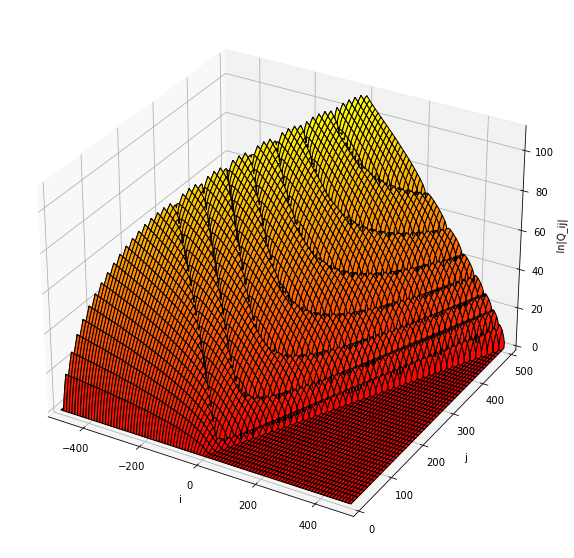

In [74]:
# Setup
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

# Make data
X = np.arange(-500, 501, 1)
Y = np.arange(0, 501, 1)
X, Y = np.meshgrid(X, Y)
ln_Q = np.log(np.abs(Qij_01000)).T

# Plot the surface
surf = ax.plot_surface(X, Y, ln_Q,rstride=10, cstride=10, cmap=cm.autumn, edgecolors='black')

# Set axes
ax.set_xlim(-505, 505)
ax.set_ylim(-5, 505)
ax.set_zlim(0, 110)
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('ln|Q_ij|')

plt.show()

We see the exponential growth in magnitude as advertised. The paths along which the surface seems to have kinks are in fact where $Q_{ij}$ flips sign. Now, we perform the numerical integration as written above to determine $\Delta\Sigma_k$ for $\Delta\eta = 0.1000$. From the 2-dimensional summation equation, we see that

$$\Delta\Sigma_k = \Delta\Sigma_{k-1} + \frac{N_f}{\alpha_s\pi^2}(\Delta\eta)^2\sum_{j=0}^{k-2}Q_{(j-k+1)j} + \frac{N_f}{\alpha_s\pi^2}(\Delta\eta)^2\sum_{i=0}^{k-1}Q_{i(k-1)}\;\;\;\;\text{and}\;\;\;\;\Delta\Sigma_1 = \frac{N_f}{\alpha_s\pi^2}(\Delta\eta)^2Q_{00}$$

We use this recursive relation in the actual calculation in order to save computation time. Recall that we use $N_f = 3$ and $\alpha_s\simeq 0.25$. The code below builds up the array for $\Delta\Sigma_k$ and make it into a `numpy` array.

In [77]:
# Define fixed constant parameters
Nf = 3
alpha_s = 0.25
Delta_eta = 0.1
K = 500

# Initialize the leading coefficient and the list
coef = Nf * (Delta_eta ** 2) / (alpha_s * (np.pi ** 2))
DSigmak_01000_list = [coef * Qij_01000[K, 0]]

# Increment the list using the recursive relation
for k in range(2, K+2):
    new_value = DSigmak_01000_list[-1]
    for j in range(k-1):
        new_value += coef * Qij_01000[K+j-k+1, j]
    for j in range(k):
        new_value += coef * Qij_01000[K+j, k-1]
    DSigmak_01000_list.append(new_value)
    
# Make the numpy array
DSigmak_01000 = np.array(DSigmak_01000_list)

Let us plot $\ln|\Delta\Sigma_k|$ multiplied by its sign, that is, $\frac{\Delta\Sigma_k}{|\Delta\Sigma_k|}\ln|\Delta\Sigma_k|$ VS $k$.

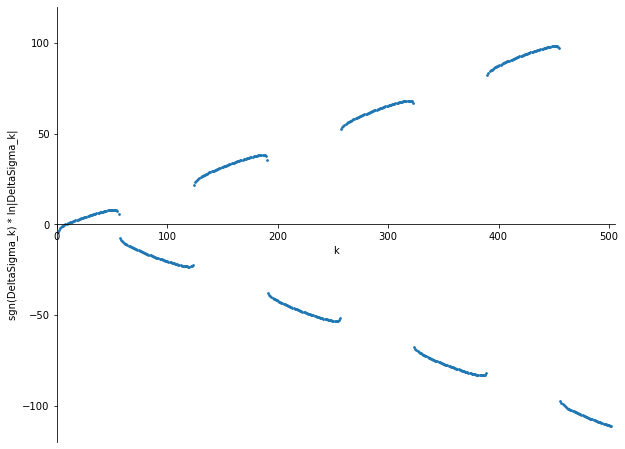

In [112]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1,1,1)

# Define the x and y arrays
k_list = np.linspace(1, 502, 501)
y = np.sign(DSigmak_01000) * np.log(np.abs(DSigmak_01000))

# Make the scatter plot
ax.scatter(k_list, y, s = 3)

# Customize axes
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlim(0, 505)
ax.set_ylim(-120, 120)
ax.set_xlabel('k')
ax.set_ylabel('sgn(DeltaSigma_k) * ln|DeltaSigma_k|')
ax.xaxis.set_label_position("bottom")
ax.yaxis.set_label_position("left")

plt.show()

This shape should inspire the ansatz given in the procedure section.

Below, we repeat the computation for five other step sizes, loading the raw $Q_{ij}$ results and performing numerical integration to obtain $\Delta\Sigma_k$.

In [117]:
def loadQ_numInt(filename, Delta_eta, K):
    """
    Load Q_ij from the filename and perform numerical integration for DeltaSigma_k
    given step size Delta_eta and number of steps K. Return both Q_ij and DeltaSigma_k
    """
    # Can customize based on your assumption
    Nf = 3
    alpha_s = 0.25
    
    # Load Q_ij
    Qij = np.genfromtxt(filepath + filename, delimiter=',')
    
    # Initialize the leading coefficient and the list
    coef = Nf * (Delta_eta ** 2) / (alpha_s * (np.pi ** 2))
    DSigmak_list = [coef * Qij[K, 0]]

    # Increment the list using the recursive relation
    for k in range(2, K+2):
        new_value = DSigmak_list[-1]
        for j in range(k-1):
            new_value += coef * Qij[K+j-k+1, j]
        for j in range(k):
            new_value += coef * Qij[K+j, k-1]
        DSigmak_list.append(new_value)

    # Make the numpy array
    DSigmak = np.array(DSigmak_list)
    
    return Qij, DSigmak

In [121]:
# Load Q_ij and compute DeltaSigma_k for each of the 5 step sizes
Qij_00750, DSigmak_00750 = loadQ_numInt("Qraw_00750.csv", 0.075, 400)
Qij_00625, DSigmak_00625 = loadQ_numInt("Qraw_00625.csv", 0.0625, 480)
Qij_00500, DSigmak_00500 = loadQ_numInt("Qraw_00500.csv", 0.05, 400)
Qij_00375, DSigmak_00375 = loadQ_numInt("Qraw_00375.csv", 0.0375, 560)
Qij_00250, DSigmak_00250 = loadQ_numInt("Qraw_00250.csv", 0.025, 800)

<a id='est1'></a>
## Bayesian Parameter Estimation I

In this section, we fit $\ln|\Delta\Sigma_k|$ with the ansatz

$$\ln|\Delta\Sigma_k| = \ln |C| + \tilde{\alpha}k + \ln\left|\cos\left(\tilde{\omega}k+\varphi\right)\right|,$$

estimating parameters $\tilde{\alpha}$, $\tilde{\omega}$, $\varphi$ and $C$ then marginalizing over $C$. Similar to the previous section, we walk through the parameters estimation process for $\Delta\eta = 0.1$ and $\eta_{\max}=50$, that is, $k_{\max} = 501 = K_{0.1}+1$. At the end of the section, we briefly repeat the process for all other step sizes and $\eta_{\max}$.

We begin by defining the log prior and log likelihood. The joint prior distribution is taken to be the product of marginal priors, which for each parameter is specified and justified follows.

* $\tilde{\alpha}$: we take advantage of the known results in the large-$N_c$ limit where $\tilde{\alpha}_{\text{large-}N_c} = \frac{4}{\sqrt{3}}\Delta\eta$. As a result, we take the marginal prior to be Gaussian with mean $\frac{4}{\sqrt{3}}\Delta\eta$ and standard deviation $\Delta\eta$.

* $\tilde{\omega}$: we see from $\Delta\Sigma_k$ plot in the previous section that the oscillation period is apparent, that is, the period must be at the very least several units of $k$. (From the plot, it is at least 100 units, but we are not supposed to decide the prior based on the data, strictly speaking.) Hence, we take $\tilde{\omega}$'s prior to be a flat prior over the range $\left[0,\frac{\pi}{10}\right]$.

* $\varphi$: the initial phase can be anything from $-\pi$ to $\pi$. However, since the sign of $\Delta\Sigma_k$ is not of our interest, phases of $\varphi$ and $\varphi+\pi$ have no difference for our purpose. Hence, we use the flat prior over the range $\left[0, \pi\right]$ for $\varphi$.

* $C$: prior large-$N_c$ results imply a safe range of $\left[0,10\right]$. We also use the flat prior.


These choices of marginal prior are reflected in the joint log prior defined below, ignoring all normalization constants.

In [546]:
def log_prior_1(alpha_tilde, omega_tilde, phi, C, Delta_eta):
    
    # Start with alpha_tilde's log prior
    alpha_tilde_mean = 4 * Delta_eta / np.sqrt(3)
    alpha_tilde_variant = Delta_eta ** 2
    answer = - ((alpha_tilde - alpha_tilde_mean) ** 2) / (2 * alpha_tilde_variant)
    
    # Add omega_tilde's log prior
    if omega_tilde <= 0 or omega_tilde > np.pi / 10:
        answer = - np.inf
    
    # Add phi's log prior
    if phi < 0 or phi >= np.pi:
        answer = - np.inf
    
    # Add C's log prior
    if C <= 0 or C > 10:
        answer = - np.inf
    
    return answer

Recall from the procedure section that the likelihood distribution is of the form

$$P(\ln|\Delta\Sigma_k||\tilde{\alpha},\tilde{\omega},\varphi,C) = \mathcal{N}\prod_{k=1}^{k_{\max}}\exp\left[-\frac{1}{2\sigma^2}\left(\ln|\Delta\Sigma_k| - \ln |C| - \tilde{\alpha}k - \ln\left|\cos\left(\tilde{\omega}k+\varphi\right)\right|\right)^2\right],$$

This allows us to define the log likelihood below, ignoring the normalization constant $\mathcal{N}$.

In [545]:
def log_likelihood_1(Delta_Sigma, alpha_tilde, omega_tilde, phi, C, sigma=5):
    
    # Make the range of k
    k_list = np.array(range(1, 1 + Delta_Sigma.shape[0]))
    
    # Compute theoretical value. Add negligible 0.00001 to avoid possible crash from ln(0).
    ln_Delta_Sigma_theory = np.log(np.abs(C) + 0.00001) + (alpha_tilde * k_list) + np.log(np.abs(np.cos((omega_tilde * k_list) + phi)) + 0.00001)
    
    # To avoid possible crash from ln(0).
    for i in range(len(ln_Delta_Sigma_theory)):
        if ln_Delta_Sigma_theory[i] < -5:
            ln_Delta_Sigma_theory[i] = -5
    
    # Compute the log likelihood based on the Gaussian likelihood distribution
    log_likelihood = - np.sum((np.log(np.abs(Delta_Sigma)) - ln_Delta_Sigma_theory) ** 2) / (2 * (sigma ** 2))
    
    return log_likelihood


Then, the log posterior distribution is just the sum of the log prior and the log likelihood.

In [544]:
def log_posterior_1(params, Delta_Sigma, Delta_eta, sigma):
    """
    Compute the log posterior. The list params = [alpha_tilde, omega_tilde, phi, C].
    """
    
    # List out the parameters with the familiar names
    alpha_tilde = params[0]
    omega_tilde = params[1]
    phi = params[2]
    C = params[3]
    
    return log_prior_1(alpha_tilde, omega_tilde, phi, C, Delta_eta) + log_likelihood_1(Delta_Sigma, alpha_tilde, omega_tilde, phi, C, sigma)


Now, we set up the MCMC simulation to estimate the posterior distribution of each model parameter. We use 100 walkers with 1,000 warm-up steps followed by 9,000 simulation steps. These hyperparameters were tuned to obtain sufficient data points well after the convergence occurs, resulting in well-constrained posterior distributions.

In [152]:
import emcee
import corner

In [543]:
def MCMC_runner_1(Delta_Sigma, Delta_eta, sigma=5, nwalkers=100, nsteps=10000, nwarmups=1000):
    """
    Runs the MCMC simulation given Delta_Sigma. Optional parameters include 
    nwalkers = number of MCMC walkers, nsteps = number of steps per walker
    and nwarmups = number of warm-up steps per walker.
    Returns the MCMC trace and the estimated log posterior.
    """
    
    print('emcee sampling (version: )', emcee.__version__)

    ndim = 4  # number of parameters in the model

    print(f'{nwalkers} walkers: {nsteps} samples each')

    # initialize walkers
    starting_guesses = np.random.randn(nwalkers, ndim)
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_1, args=[Delta_Sigma, Delta_eta, sigma])
    %time sampler.run_mcmc(starting_guesses, nsteps)
    print("done")
    
    emcee_trace = sampler.chain[:, nwarmups:, :].reshape(-1, ndim).T
    emcee_lnprob = sampler.lnprobability[:, nwarmups:].reshape(-1).T
    
    return emcee_trace, emcee_lnprob

In [672]:
# Run MCMC for Delta_eta = 0.1
trace_01000_50, lnprob_01000_50 = MCMC_runner_1(DSigmak_01000, 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 3min 35s, sys: 494 ms, total: 3min 36s
Wall time: 3min 37s
done


The pairwise and marginal posterior distributions of the model parameters are shown in the `corner` plot below.

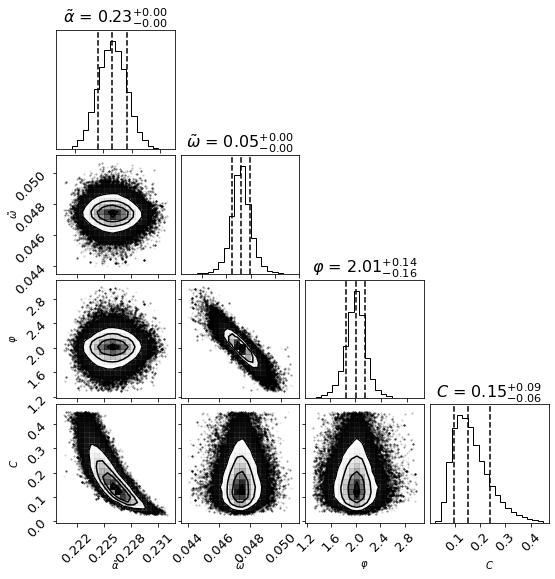

In [682]:
fig, ax = plt.subplots(4,4, figsize=(8,8))
corner.corner(trace_01000_50.T, labels=[r"$\tilde{\alpha}$", r"$\tilde{\omega}$", r"$\varphi$", r"$C$"],
              quantiles=[0.16, 0.5, 0.84], fig=fig,show_titles=True, 
              title_kwargs={"fontsize": 16});
for ax in fig.get_axes():  
      ax.tick_params(axis='both', labelsize=13)

The `corner` plot shows significant negative correlations between $\tilde{\omega}$ and $\varphi$, and between $\tilde{\alpha}$ and $C$. These tradeoffs, especially the latter one, are straightforward to see from the shape of the function $\ln|\Delta\Sigma_k|$.

Below, we explicitly compute the median as parameter estimate and the 1-standard deviation confidence interval. This allows us to display them at a better accuracy than in the `corner` plot and to store their values for the next section.

In [685]:
parameters_name = ["alpha_tilde", "omega_tilde", "phi", "C"]

LB_percentile = 0.16     # Position of the lower bound for the confidence interval
UB_percentile = 0.84     # Position of the upper bound for the confidence interval

# Define the arrays holding the median, the upper bound (UB) and the lower bound (LB) 
# of the confidence interval.
medians_01000_50 = [0, 0, 0, 0]
UB_01000_50 = [0, 0, 0, 0]
LB_01000_50 = [0, 0, 0, 0]

# Sort the emcee trace and use it to compute median and boundaries.
for j in range(4):
    this_trace = np.sort(trace_01000_50[j])
    length = trace_01000_50.shape[1]
    medians_01000_50[j] = this_trace[length // 2]
    UB_01000_50[j] = this_trace[int(UB_percentile * length)]
    LB_01000_50[j] = this_trace[int(LB_percentile * length)]
    print("Estimated " + parameters_name[j] + ": %.4f (-%.4f, +%.4f)" % (medians_01000_50[j], medians_01000_50[j] - LB_01000_50[j], UB_01000_50[j] - medians_01000_50[j]))
    

Estimated alpha_tilde: 0.2259 (-0.0015, +0.0015)
Estimated omega_tilde: 0.0474 (-0.0005, +0.0006)
Estimated phi: 2.0058 (-0.1579, +0.1436)
Estimated C: 0.1545 (-0.0561, +0.0853)


Note that we will never look at the estimate or the confidence interval for $C$ again after this section, as it is not important to our physical interpretation.

The following function allows us to quickly repeat the process in determining the parameter estimates, i.e. the median, and their confidence interval boundaries.

In [542]:
def MCMC_to_CI(Delta_Sigma, Delta_eta, sigma=5, nwalkers=100, nsteps=10000, nwarmups=1000, LB_percentile=0.16, UB_percentile=0.84):
    
    # Perform MCMC and obtain the trace and lnprob
    emcee_trace, emcee_lnprob = MCMC_runner_1(Delta_Sigma, Delta_eta, sigma, nwalkers, nsteps, nwarmups)
    
    # Initiate the arrays for the median and the boundaries
    medians = [0, 0, 0, 0]
    UB = [0, 0, 0, 0]
    LB = [0, 0, 0, 0]
    
    # Sort the emcee trace and use it to compute median and boundaries.
    for j in range(4):
        emcee_trace_sorted = np.sort(emcee_trace[j])
        length = emcee_trace_sorted.shape[0]
        medians[j] = emcee_trace_sorted[length // 2]
        UB[j] = emcee_trace_sorted[int(UB_percentile * length)]
        LB[j] = emcee_trace_sorted[int(LB_percentile * length)]
    
    return medians, UB, LB, emcee_trace, emcee_lnprob
    

Now, we repeat the process for $\Delta\eta = 0.1$ and $\eta_{\max} = 45$. ([Click here to jump to the next section.](#section_id))

In [552]:
medians_01000_45, UB_01000_45, LB_01000_45, trace_01000_45, lnprob_01000_45 = MCMC_to_CI(DSigmak_01000[:452], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 3min 20s, sys: 893 ms, total: 3min 21s
Wall time: 3min 22s
done


$\Delta\eta = 0.1$, $\eta_{\max} = 40$

In [553]:
medians_01000_40, UB_01000_40, LB_01000_40, trace_01000_40, lnprob_01000_40 = MCMC_to_CI(DSigmak_01000[:402], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 57s, sys: 747 ms, total: 2min 58s
Wall time: 2min 58s
done


$\Delta\eta = 0.1$, $\eta_{\max} = 35$

In [554]:
medians_01000_35, UB_01000_35, LB_01000_35, trace_01000_35, lnprob_01000_35 = MCMC_to_CI(DSigmak_01000[:352], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 38s, sys: 526 ms, total: 2min 39s
Wall time: 2min 39s
done


$\Delta\eta = 0.1$, $\eta_{\max} = 30$

In [555]:
medians_01000_30, UB_01000_30, LB_01000_30, trace_01000_30, lnprob_01000_30 = MCMC_to_CI(DSigmak_01000[:302], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 18s, sys: 497 ms, total: 2min 18s
Wall time: 2min 18s
done


$\Delta\eta = 0.1$, $\eta_{\max} = 25$

In [556]:
medians_01000_25, UB_01000_25, LB_01000_25, trace_01000_25, lnprob_01000_25 = MCMC_to_CI(DSigmak_01000[:252], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 1s, sys: 448 ms, total: 2min 1s
Wall time: 2min 2s
done


$\Delta\eta = 0.1$, $\eta_{\max} = 20$

In [557]:
medians_01000_20, UB_01000_20, LB_01000_20, trace_01000_20, lnprob_01000_20 = MCMC_to_CI(DSigmak_01000[:202], 0.1)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 1min 52s, sys: 602 ms, total: 1min 52s
Wall time: 1min 54s
done


$\Delta\eta = 0.075$, $\eta_{\max} = 30$

In [558]:
medians_00750_30, UB_00750_30, LB_00750_30, trace_00750_30, lnprob_00750_30 = MCMC_to_CI(DSigmak_00750, 0.075)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 3min 6s, sys: 813 ms, total: 3min 6s
Wall time: 3min 7s
done


$\Delta\eta = 0.075$, $\eta_{\max} = 25$

In [559]:
medians_00750_25, UB_00750_25, LB_00750_25, trace_00750_25, lnprob_00750_25 = MCMC_to_CI(DSigmak_00750[:336], 0.075)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 33s, sys: 524 ms, total: 2min 33s
Wall time: 2min 34s
done


$\Delta\eta = 0.075$, $\eta_{\max} = 20$

In [560]:
medians_00750_20, UB_00750_20, LB_00750_20, trace_00750_20, lnprob_00750_20 = MCMC_to_CI(DSigmak_00750[:269], 0.075)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 10s, sys: 469 ms, total: 2min 10s
Wall time: 2min 11s
done


$\Delta\eta = 0.0625$, $\eta_{\max} = 30$

In [561]:
medians_00625_30, UB_00625_30, LB_00625_30, trace_00625_30, lnprob_00625_30 = MCMC_to_CI(DSigmak_00625, 0.0625)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 3min 28s, sys: 1.02 s, total: 3min 29s
Wall time: 3min 31s
done


$\Delta\eta = 0.0625$, $\eta_{\max} = 25$

In [562]:
medians_00625_25, UB_00625_25, LB_00625_25, trace_00625_25, lnprob_00625_25 = MCMC_to_CI(DSigmak_00625[:402], 0.0625)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 59s, sys: 697 ms, total: 3min
Wall time: 3min
done


$\Delta\eta = 0.0625$, $\eta_{\max} = 20$

In [563]:
medians_00625_20, UB_00625_20, LB_00625_20, trace_00625_20, lnprob_00625_20 = MCMC_to_CI(DSigmak_00625[:322], 0.0625)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 29s, sys: 495 ms, total: 2min 29s
Wall time: 2min 30s
done


$\Delta\eta = 0.05$, $\eta_{\max} = 20$

In [564]:
medians_00500_20, UB_00500_20, LB_00500_20, trace_00500_20, lnprob_00500_20 = MCMC_to_CI(DSigmak_00500, 0.05)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 2min 58s, sys: 619 ms, total: 2min 59s
Wall time: 2min 59s
done


$\Delta\eta = 0.0375$, $\eta_{\max} = 20$

In [565]:
medians_00375_20, UB_00375_20, LB_00375_20, trace_00375_20, lnprob_00375_20 = MCMC_to_CI(DSigmak_00375, 0.0375)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 3min 58s, sys: 387 ms, total: 3min 58s
Wall time: 3min 59s
done


$\Delta\eta = 0.025$, $\eta_{\max} = 20$

In [566]:
medians_00250_20, UB_00250_20, LB_00250_20, trace_00250_20, lnprob_00250_20 = MCMC_to_CI(DSigmak_00250, 0.025)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 5min 31s, sys: 618 ms, total: 5min 32s
Wall time: 5min 34s
done


The shapes of the posterior distributions are similar across all values of $\Delta\eta$.


<a id='section_id'></a>
## Bayesian Parameter Estimation II

Recall from their definitions that $\tilde{\alpha}$ and $\tilde{\omega}$ are defined such that they depend on $\Delta\eta$, while $\alpha$ and $\omega$ are not, despite the relatively mild difference coming from discretization process in the computation. In this section, examine the relation between each parameter from the previous section and the corresponding $\Delta\eta$ and $\eta_{\max}$, with the ultimate goal of estimating these model parameters, together with their error bars, in the small-$x$ continuum limit where $\Delta\eta\to 0$ and $\frac{1}{\eta_{\max}}\to 0$.

We begin by examining how these parameter estimates vary with the $\Delta\eta$ and $\eta_{\max}$. Below, we make the plots with error bars for each parameter versus $\Delta\eta$ (for $\eta_{\max} = 20$) and then versus $\frac{1}{\eta_{\max}}$ (for $\Delta\eta=0.1$).

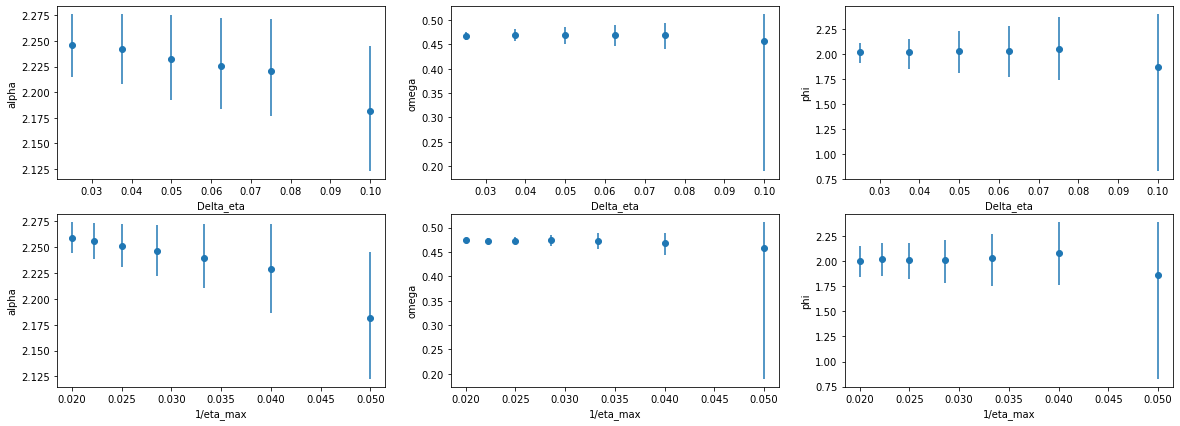

In [692]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))

# Making arrays for Delta_eta plot
step_sizes = [0.1, 0.075, 0.0625, 0.05, 0.0375, 0.025]
medians_1 = [medians_01000_20, medians_00750_20, medians_00625_20, 
             medians_00500_20, medians_00375_20, medians_00250_20]
UB_1 = [UB_01000_20, UB_00750_20, UB_00625_20, UB_00500_20, UB_00375_20, UB_00250_20]
LB_1 = [LB_01000_20, LB_00750_20, LB_00625_20, LB_00500_20, LB_00375_20, LB_00250_20]

# alpha_tilde divided by delta_eta, positioned based on step_sizes
alphas_1 = [medians_1[i][0] / step_sizes[i] for i in range(len(step_sizes))]
alphas_1_UB = [UB_1[i][0] / step_sizes[i] for i in range(len(step_sizes))]
alphas_1_LB = [LB_1[i][0] / step_sizes[i] for i in range(len(step_sizes))]

# omega_tilde divided by delta_eta, positioned based on step_sizes
omegas_1 = [medians_1[i][1] / step_sizes[i] for i in range(len(step_sizes))]
omegas_1_UB = [UB_1[i][1] / step_sizes[i] for i in range(len(step_sizes))]
omegas_1_LB = [LB_1[i][1] / step_sizes[i] for i in range(len(step_sizes))]

# phi, positioned based on step_sizes
phis_1 = [medians_1[i][2] for i in range(len(step_sizes))]
phis_1_UB = [UB_1[i][2] for i in range(len(step_sizes))]
phis_1_LB = [LB_1[i][2] for i in range(len(step_sizes))]

# Making plots vs Delta_eta
# alpha plot
alphas_1_err = [[alphas_1[i] - alphas_1_LB[i] for i in range(len(step_sizes))], 
                [alphas_1_UB[i] - alphas_1[i] for i in range(len(step_sizes))]]
ax[0, 0].errorbar(step_sizes, alphas_1, alphas_1_err, fmt = 'o')
ax[0, 0].set(xlabel="Delta_eta",ylabel="alpha")

# omega plot
omegas_1_err = [[omegas_1[i] - omegas_1_LB[i] for i in range(len(step_sizes))], 
                [omegas_1_UB[i] - omegas_1[i] for i in range(len(step_sizes))]]
ax[0, 1].errorbar(step_sizes, omegas_1, omegas_1_err, fmt = 'o')
ax[0, 1].set(xlabel="Delta_eta",ylabel="omega")

# phi plot
phis_1_err = [[phis_1[i] - phis_1_LB[i] for i in range(len(step_sizes))], 
              [phis_1_UB[i] - phis_1[i] for i in range(len(step_sizes))]]
ax[0, 2].errorbar(step_sizes, phis_1, phis_1_err, fmt = 'o')
ax[0, 2].set(xlabel="Delta_eta",ylabel="phi")

# Making arrays for eta_max plot
eta_maxs_reci = [1/50, 1/45, 1/40, 1/35, 1/30, 1/25, 1/20]
medians_2 = [medians_01000_50, medians_01000_45, medians_01000_40, medians_01000_35,
             medians_01000_30, medians_01000_25, medians_01000_20]
UB_2 = [UB_01000_50, UB_01000_45, UB_01000_40, UB_01000_35, UB_01000_30, UB_01000_25, UB_01000_20]
LB_2 = [LB_01000_50, LB_01000_45, LB_01000_40, LB_01000_35, LB_01000_30, LB_01000_25, LB_01000_20]

# alpha_tilde divided by delta_eta, positioned based on eta_max 
alphas_2 = [medians_2[i][0] / 0.1 for i in range(len(eta_maxs_reci))]
alphas_2_UB = [UB_2[i][0] / 0.1 for i in range(len(eta_maxs_reci))]
alphas_2_LB = [LB_2[i][0] / 0.1 for i in range(len(eta_maxs_reci))]

# omega_tilde divided by delta_eta, positioned based on eta_max 
omegas_2 = [medians_2[i][1] / 0.1 for i in range(len(eta_maxs_reci))]
omegas_2_UB = [UB_2[i][1] / 0.1 for i in range(len(eta_maxs_reci))]
omegas_2_LB = [LB_2[i][1] / 0.1 for i in range(len(eta_maxs_reci))]

# phi, positioned based on eta_max 
phis_2 = [medians_2[i][2] for i in range(len(eta_maxs_reci))]
phis_2_UB = [UB_2[i][2] for i in range(len(eta_maxs_reci))]
phis_2_LB = [LB_2[i][2] for i in range(len(eta_maxs_reci))]

# Making plots vs 1/eta_max 
# alpha plot
alphas_2_err = [[alphas_2[i] - alphas_2_LB[i] for i in range(len(eta_maxs_reci))], 
                [alphas_2_UB[i] - alphas_2[i] for i in range(len(eta_maxs_reci))]]
ax[1, 0].errorbar(eta_maxs_reci, alphas_2, alphas_2_err, fmt = 'o')
ax[1, 0].set(xlabel="1/eta_max",ylabel="alpha")

# omega plot
omegas_2_err = [[omegas_2[i] - omegas_2_LB[i] for i in range(len(eta_maxs_reci))], 
                [omegas_2_UB[i] - omegas_2[i] for i in range(len(eta_maxs_reci))]]
ax[1, 1].errorbar(eta_maxs_reci, omegas_2, omegas_2_err, fmt = 'o')
ax[1, 1].set(xlabel="1/eta_max",ylabel="omega")

# phi plot
phis_2_err = [[phis_2[i] - phis_2_LB[i] for i in range(len(eta_maxs_reci))], 
              [phis_2_UB[i] - phis_2[i] for i in range(len(eta_maxs_reci))]]
ax[1, 2].errorbar(eta_maxs_reci, phis_2, phis_2_err, fmt = 'o')
ax[1, 2].set(xlabel="1/eta_max",ylabel="phi")

plt.show()

It makes sense that the parameter estimates with small $\eta_{\max}$ and/or large $\Delta\eta$ have larger error bars, as they correspond to the case most different from the physical small-$x$ regime. Although the plots above display a mostly linear (or even constant) patterns, we keep thing general for the time being and use the quadratic model:

$$\alpha = \alpha_{cont} + b_1 (\Delta\eta) + b_2 (1/\eta_{\max}) + b_3 (\Delta\eta / \eta_{\max}) + b_4 (\Delta\eta)^2 + b_5 (1/\eta_{\max})^2,$$

where we recall that $\alpha_{cont}$ is $\alpha$ is the small-$x$ continuum limit, which is the ultimate goal of this project. If the correct model is simpler than the quadratic model we wrote down, some coefficient estimates will be within their error bars from zero. The models for $\omega$ and $\varphi$ are similar. We will show each step in details for $\alpha$ and quickly repeat for $\omega$ and $\varphi$ towards the end of the section. 

We take the prior distributions for each coefficient $b_i$ to be a Gaussian with mean zero and standard deviation 1000, that is, very flexible prior due to the lack of background knowledge about them. For $\alpha_{cont}$, since the plots above show relatively mild variation of $\alpha$ with $\Delta\eta$ and $1/\eta_{\max}$, we take $\alpha_{cont}$'s prior to be a Gaussian centered at its large-$N_c$ value of $\frac{4}{\sqrt{3}}$ with standard deviation 1. Again, we ignore the normalization constant.

In [727]:
def log_prior_2(alpha_cont, b):
    
    # Start with alpha_cont's Gaussian
    answer = - 0.5 * (alpha_cont - (4 / np.sqrt(3))) ** 2
    
    # Add the Gaussian log prior for each b
    for i in range(5):
        answer += - (0.5 / (1000 ** 2)) * (b[i] ** 2) 
    
    return answer

The likelihood is also Gaussian with standard deviation given by the error bar of each data point. 

In [726]:
def log_likelihood_2(alpha_cont, b, Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors):
    
    # Compute the theoretical value
    alpha_theory = alpha_cont + (b[0] * Delta_eta_list) + (b[1] * inv_eta_max_list) + (b[2] * Delta_eta_list * inv_eta_max_list) + (b[3] * (Delta_eta_list ** 2)) + (b[4] * (inv_eta_max_list ** 2))
    
    # Compute the log likehood, summing over all available alpha estimates
    log_likelihood = - 0.5 * np.sum(((alpha_estimates - alpha_theory) * (alpha_errors ** -1)) ** 2)
    
    return log_likelihood
    

In [728]:
def log_posterior_2(params, Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors):
    
    return log_prior_2(params[0], params[1:]) + log_likelihood_2(params[0], params[1:], Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors)


Now, we construct the comprehensive list of parameter estimates and their error bars.

In [723]:
# First Delta_eta and eta_max
Delta_eta_list = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.075, 0.075, 0.075, 0.0625, 0.0625, 0.0625, 0.05, 
                           0.0375, 0.025])
inv_eta_max_list = np.array([1/50, 1/45, 1/40, 1/35, 1/30, 1/25, 1/20, 1/30, 1/25, 1/20, 1/30, 1/25, 1/20, 1/20, 
                             1/20, 1/20])

# Now the parameter estimates and their errors
alpha_estimates = np.array([medians_01000_50[0] / 0.1, medians_01000_45[0] / 0.1, medians_01000_40[0] / 0.1, 
                           medians_01000_35[0] / 0.1, medians_01000_30[0] / 0.1, medians_01000_25[0] / 0.1, 
                           medians_01000_20[0] / 0.1, medians_00750_30[0] / 0.075, medians_00750_25[0] / 0.075, 
                           medians_00750_20[0] / 0.075, medians_00625_30[0] / 0.0625, medians_00625_25[0] / 0.0625,
                           medians_00625_20[0] / 0.0625, medians_00500_20[0] / 0.05, medians_00375_20[0] / 0.0375,
                           medians_00250_20[0] / 0.025])
alpha_errors = np.array([(UB_01000_50[0] - LB_01000_50[0]) / (2 * 0.1), (UB_01000_45[0] - LB_01000_45[0]) / (2 * 0.1), 
                        (UB_01000_40[0] - LB_01000_40[0]) / (2 * 0.1), (UB_01000_35[0] - LB_01000_35[0]) / (2 * 0.1), 
                        (UB_01000_30[0] - LB_01000_30[0]) / (2 * 0.1), (UB_01000_25[0] - LB_01000_25[0]) / (2 * 0.1), 
                        (UB_01000_20[0] - LB_01000_20[0]) / (2 * 0.1), (UB_00750_30[0] - LB_00750_30[0]) / (2 * 0.075),
                        (UB_00750_25[0] - LB_00750_25[0]) / (2 * 0.075), (UB_00750_20[0] - LB_00750_20[0]) / (2 * 0.075),
                        (UB_00625_30[0] - LB_00625_30[0]) / (2 * 0.0625), (UB_00625_25[0] - LB_00625_25[0]) / (2 * 0.0625),
                        (UB_00625_20[0] - LB_00625_20[0]) / (2 * 0.0625), (UB_00500_20[0] - LB_00500_20[0]) / (2 * 0.05),
                        (UB_00375_20[0] - LB_00375_20[0]) / (2 * 0.0375), (UB_00250_20[0] - LB_00250_20[0]) / (2 * 0.025)])
omega_estimates = np.array([medians_01000_50[1] / 0.1, medians_01000_45[1] / 0.1, medians_01000_40[1] / 0.1, 
                           medians_01000_35[1] / 0.1, medians_01000_30[1] / 0.1, medians_01000_25[1] / 0.1, 
                           medians_01000_20[1] / 0.1, medians_00750_30[1] / 0.075, medians_00750_25[1] / 0.075, 
                           medians_00750_20[1] / 0.075, medians_00625_30[1] / 0.0625, medians_00625_25[1] / 0.0625,
                           medians_00625_20[1] / 0.0625, medians_00500_20[1] / 0.05, medians_00375_20[1] / 0.0375,
                           medians_00250_20[1] / 0.025])
omega_errors = np.array([(UB_01000_50[1] - LB_01000_50[1]) / (2 * 0.1), (UB_01000_45[1] - LB_01000_45[1]) / (2 * 0.1), 
                        (UB_01000_40[1] - LB_01000_40[1]) / (2 * 0.1), (UB_01000_35[1] - LB_01000_35[1]) / (2 * 0.1), 
                        (UB_01000_30[1] - LB_01000_30[1]) / (2 * 0.1), (UB_01000_25[1] - LB_01000_25[1]) / (2 * 0.1), 
                        (UB_01000_20[1] - LB_01000_20[1]) / (2 * 0.1), (UB_00750_30[1] - LB_00750_30[1]) / (2 * 0.075),
                        (UB_00750_25[1] - LB_00750_25[1]) / (2 * 0.075), (UB_00750_20[1] - LB_00750_20[1]) / (2 * 0.075),
                        (UB_00625_30[1] - LB_00625_30[1]) / (2 * 0.0625), (UB_00625_25[1] - LB_00625_25[1]) / (2 * 0.0625),
                        (UB_00625_20[1] - LB_00625_20[1]) / (2 * 0.0625), (UB_00500_20[1] - LB_00500_20[1]) / (2 * 0.05),
                        (UB_00375_20[1] - LB_00375_20[1]) / (2 * 0.0375), (UB_00250_20[1] - LB_00250_20[1]) / (2 * 0.025)])
phi_estimates = np.array([medians_01000_50[2], medians_01000_45[2], medians_01000_40[2],
                         medians_01000_35[2], medians_01000_30[2], medians_01000_25[2], 
                         medians_01000_20[2], medians_00750_30[2], medians_00750_25[2], 
                         medians_00750_20[2], medians_00625_30[2], medians_00625_25[2],
                         medians_00625_20[2], medians_00500_20[2], medians_00375_20[2],
                         medians_00250_20[2]])
phi_errors = np.array([(UB_01000_50[2] - LB_01000_50[2]) / 2, (UB_01000_45[2] - LB_01000_45[2]) / 2, 
                      (UB_01000_40[2] - LB_01000_40[2]) / 2, (UB_01000_35[2] - LB_01000_35[2]) / 2, 
                      (UB_01000_30[2] - LB_01000_30[2]) / 2, (UB_01000_25[2] - LB_01000_25[2]) / 2, 
                      (UB_01000_20[2] - LB_01000_20[2]) / 2, (UB_00750_30[2] - LB_00750_30[2]) / 2,
                      (UB_00750_25[2] - LB_00750_25[2]) / 2, (UB_00750_20[2] - LB_00750_20[2]) / 2,
                      (UB_00625_30[2] - LB_00625_30[2]) / 2, (UB_00625_25[2] - LB_00625_25[2]) / 2,
                      (UB_00625_20[2] - LB_00625_20[2]) / 2, (UB_00500_20[2] - LB_00500_20[2]) / 2,
                      (UB_00375_20[2] - LB_00375_20[2]) / 2, (UB_00250_20[2] - LB_00250_20[2]) / 2])


Now, we run MCMC once again to determine the posterior distribution of $\alpha_{cont}$ and $b_i$'s.

In [734]:
def MCMC_runner_2(Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors, nwalkers=100, nsteps=10000, nwarmups=1000):
    """
    Runs the MCMC simulation given Delta_Sigma. Optional parameters include 
    nwalkers = number of MCMC walkers, nsteps = number of steps per walker
    and nwarmups = number of warm-up steps per walker.
    Returns the MCMC trace and the estimated log posterior.
    """
    
    print('emcee sampling (version: )', emcee.__version__)

    ndim = 6  # number of parameters in the model

    print(f'{nwalkers} walkers: {nsteps} samples each')

    # initialize walkers
    starting_guesses = np.random.randn(nwalkers, ndim)
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_2, 
                                    args=[Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors])
    %time sampler.run_mcmc(starting_guesses, nsteps)
    print("done")
    
    emcee_trace = sampler.chain[:, nwarmups:, :].reshape(-1, ndim).T
    emcee_lnprob = sampler.lnprobability[:, nwarmups:].reshape(-1).T
    
    return emcee_trace, emcee_lnprob


In [735]:
trace_alpha, lnprob_alpha = MCMC_runner_2(Delta_eta_list, inv_eta_max_list, alpha_estimates, alpha_errors)

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 29 s, sys: 123 ms, total: 29.2 s
Wall time: 29.3 s
done


The `corner` plot for $\alpha$ is given below. 

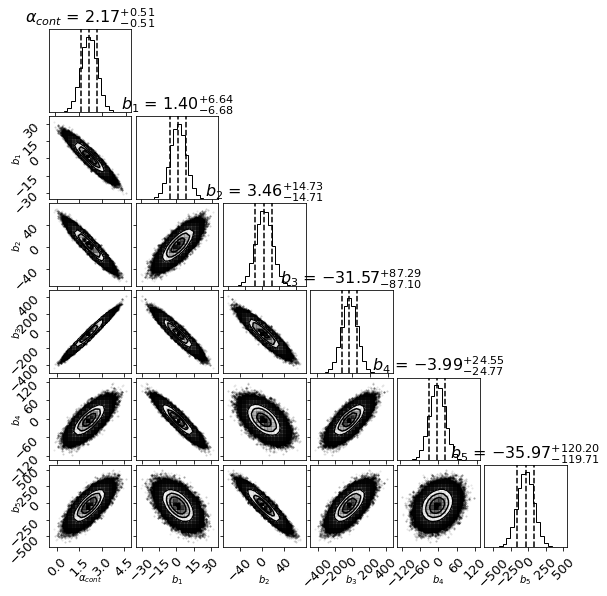

In [737]:
fig, ax = plt.subplots(6,6, figsize=(8,8))
corner.corner(trace_alpha.T, labels=[r"$\alpha_{cont}$", r"$b_1$", r"$b_2$", r"$b_3$", r"$b_4$", r"$b_5$"],
              quantiles=[0.16, 0.5, 0.84], fig=fig,show_titles=True, 
              title_kwargs={"fontsize": 16});
for ax in fig.get_axes():  
      ax.tick_params(axis='both', labelsize=13)

From the plot, we see that only $\alpha_{cont}$ is farther than a standard deviation away from zero. In other words, only the constant term is significant in our model, that is, given the data we have and given parameter estimation we did in the previous section, we obtain

$$\alpha_{Bayes} = (2.17 \pm 0.51)\sqrt{\frac{\alpha_sN_c}{2\pi}}.$$

This should be compared to 

$$\alpha_{freq} = (2.304 \pm 0.012)\sqrt{\frac{\alpha_sN_c}{2\pi}}$$

obtained in the reference using a frequentist fitting approach. The two results agree within the margin of error. However, we see that the frequentist approach greatly underestimates the size of the error bar. This tends to be the case when comparing parameter estimation using a frequentist approach with that using a Bayesian approach.

Now, we repeat the Bayesian fitting process with $\omega$. Despite what we found for $\alpha$, we still begin with the quadratic model.

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 29.3 s, sys: 136 ms, total: 29.4 s
Wall time: 29.5 s
done


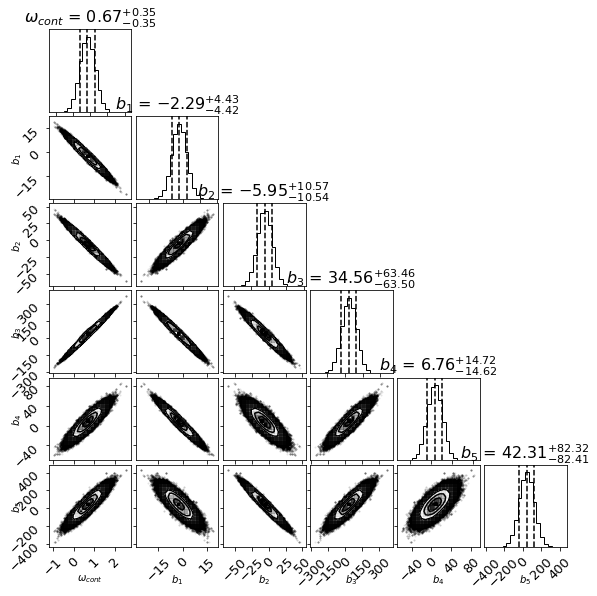

In [738]:
# Run MCMC
trace_omega, lnprob_omega = MCMC_runner_2(Delta_eta_list, inv_eta_max_list, omega_estimates, omega_errors)

# Make the Corner plot
fig, ax = plt.subplots(6,6, figsize=(8,8))
corner.corner(trace_omega.T, labels=[r"$\omega_{cont}$", r"$b_1$", r"$b_2$", r"$b_3$", r"$b_4$", r"$b_5$"],
              quantiles=[0.16, 0.5, 0.84], fig=fig,show_titles=True, 
              title_kwargs={"fontsize": 16});
for ax in fig.get_axes():  
      ax.tick_params(axis='both', labelsize=13)

Similarly, the process is repeated below for $\varphi$.

emcee sampling (version: ) 3.1.1
100 walkers: 10000 samples each
CPU times: user 29.4 s, sys: 156 ms, total: 29.5 s
Wall time: 29.4 s
done


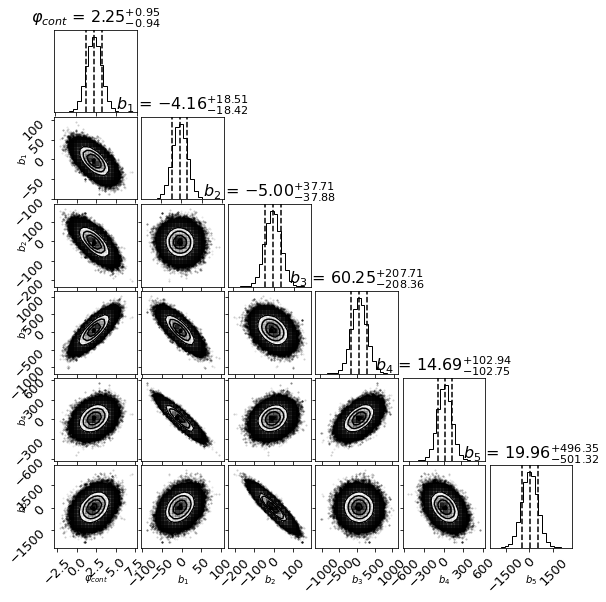

In [739]:
# Run MCMC
trace_phi, lnprob_phi = MCMC_runner_2(Delta_eta_list, inv_eta_max_list, phi_estimates, phi_errors)

# Make the Corner plot
fig, ax = plt.subplots(6,6, figsize=(8,8))
corner.corner(trace_phi.T, labels=[r"$\varphi_{cont}$", r"$b_1$", r"$b_2$", r"$b_3$", r"$b_4$", r"$b_5$"],
              quantiles=[0.16, 0.5, 0.84], fig=fig,show_titles=True, 
              title_kwargs={"fontsize": 16});
for ax in fig.get_axes():  
      ax.tick_params(axis='both', labelsize=13)

For both $\omega$ and $\varphi$, the results are similar to that of $\alpha$; only the intercept terms are significant. Furthermore, for both variables, the Bayesian estimates also agree with the frequentist estimates from the reference within the error bars, which are much larger for the Bayesian estimates. We summarize the frequentist and Bayesian parameter estimates in the table below.

| Parameters | &nbsp; Bayesian estimates | &nbsp; Frequentist estimates |
| :-: | :-- | :-- |
| $\alpha$  | $(2.17 \pm 0.51)\sqrt{\frac{\alpha_sN_c}{2\pi}}$ | $(2.304 \pm 0.012)\sqrt{\frac{\alpha_sN_c}{2\pi}}$ |
| $\omega$  | $(0.67 \pm 0.35)\sqrt{\frac{\alpha_sN_c}{2\pi}}$ | $(0.469 \pm 0.006)\sqrt{\frac{\alpha_sN_c}{2\pi}}$ |
| $\varphi$ | $2.25 \pm 0.95$ | $1.89 \pm 0.05$ |






<a id='conc'></a>
## Conclusion


In this project, we employ a Bayesian framework to repeat the parameter estimation steps performed using a frequentist approach in [arXiv:2005.07285](https://arxiv.org/abs/2005.07285). An interested reader is strongly encouraged to read the reference for an enhanced understanding of both the frequentist approach used there and the complete physics context of the work. 

The parameter estimates from both approaches agree within their error bars. However, the discrepancy in the size of the error bars, with the Bayesian approach consistently yielding a much larger uncertainty, raises concern about the legitimacy of uncertainty estimation scheme used in frequentist approaches. This is due partly to the fact that the Bayesian approach deals with the uncertainty systematically through the shape of posterior distribution. Both estimates of $\alpha$ agree with the prior large-$N_c$ result, which was derived both numerically and analytically, up to the uncertainty.

With our ansatz, the quark helicity PDF has the following behavior, 

$$\Delta\Sigma(x) \sim \left(\frac{1}{x}\right)^{\alpha}\cos\left[\omega\ln\frac{1}{x} + \varphi\right],$$

as $x\to 0$, with the values of $\alpha$, $\omega$ and $\varphi$ given in the summary table above. This is the main result of our project. To infer from this result the quark helicity inside a proton, not only does one need to determine the large-$x$ contribution from the experiments, but additional work must also be done to reconcile the two results at some moderate $x$. This is a non-trivial problem that deserves a scientific paper on its own. Similar study has been done for the cleaner large-$N_c$ case. In particular, [arXiv:2102.06159](https://arxiv.org/abs/2102.06159) and [arXiv:2108.02070](https://arxiv.org/abs/2108.02070). 

Although the proton spin puzzle still remains a puzzle today, a great amount of progress has been made over the past few decades. Starting off as a proton spin "crisis," physicists have obtained sufficient understanding to tame its status down to a "puzzle," in the sense that we now know how the spin is distributed qualitatively. Looking into the future, the problem will continue to move towards the direction of a precision science, especially with newer generations of high-energy scattering experiments coming up in the near future.



[Back to top](#top)